### Collection of Sportradar API requests to collect Glossary, League Schedules, and gather Team and Game ID's to download Play-by-play data for pitchers of interest in future Jupyter Notebooks.

Links:
https://developer.sportradar.com/files/2017_Sportradar_MLB_Statistics_Summary.pdf
https://developer.sportradar.com/files/2017_Sportradar_MLB_Statistics_Feeds.pdf

In [7]:
# 90-day Free Trial (start-date = 9/9/2018)
filename = 'api_key'

# using function from "Keeping API Keys Secret.ipynb"
# by https://github.com/dylburger
def get_file_contents(filename):
    """ 
    Given a filename,
    return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

my_api_key = get_file_contents(filename)

#### Import packages

* http.client - required for Sportradar API to make HTTP requests
* json - required to save and load JSON files extracted from Sportradar
* numpy & pandas - required for data wrangling and cleaning

In [8]:
import os
import http.client
import time
import json
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from dateutil import tz

#### MLB API Map
https://developer.sportradar.com/

To best utilize the **MLB API**, several parameters are required to create the API calls. The map below illustrates how to obtain the parameters needed.

The **primary feeds** require only a `date` or `season` to call the endpoints. Those feeds provide `Game`, `Team`, or `Player Id's` which can be used to generate the `game`, `team`, and `player` feeds. All of the other feeds require no variables.

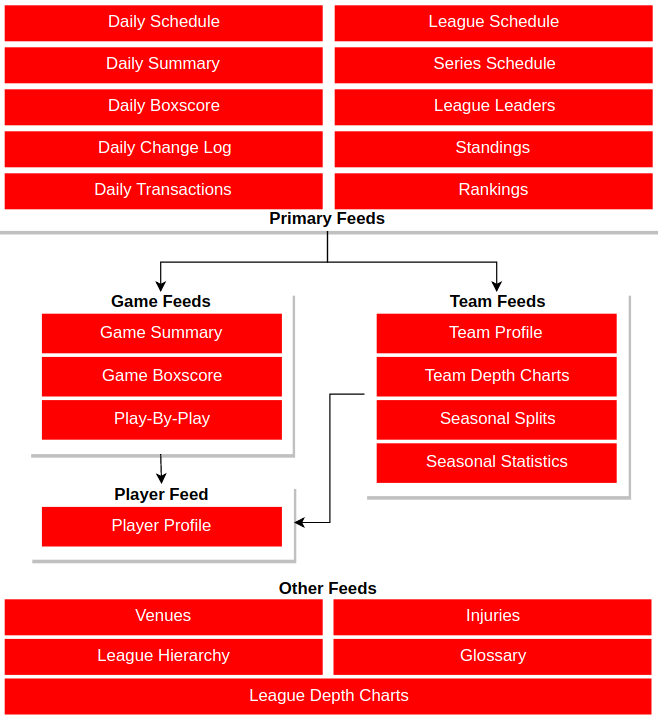
<center> image source: https://developer.sportradar.com/docs/read/baseball/MLB_v65 </center>

## Objective:  Gather Pitching Stats for MLB Starting Pitchers for 2016 - 2018 Seasons

* Get Team IDs using Primary Feed (League Schedules)
* Using Team IDs, get Player IDs for Pitchers

#### Download the Sportradar Glossary

In [9]:
# NOTE: Comment out entire cell once glossary json file downloaded from sportradar
#       to avoid duplicate calls using limited trial API

# request string to access MLB v6.5 Glossary combined with api key
#request_glossary = "/mlb/trial/v6.5/en/league/glossary.json?api_key=" + my_api_key

#conn = http.client.HTTPSConnection("api.sportradar.us")
#conn.request("GET", request_glossary)

#res = conn.getresponse()
#json_glossary = json.loads(res.read().decode("utf-8"))

# write results to json output file
#with open('data/mlb_v6_glossary.json', 'w') as outfile:
#    json.dump(json_glossary, outfile)

In [10]:
# open json file and use list comprehension to extract list of entries
path = 'data/mlb_v6_glossary.json'
glossary_list = [json.loads(line) for line in open(path)]

# show columns available to review
glossary_list[0].keys()

dict_keys(['pitch_types', 'player_statuses', 'pitch_outcomes', 'game_statuses', 'runner_outcomes', 'post_season_games', 'player_positions', '_comment'])

In [11]:
# use column name (key) to display glossary (values)
glossary_list[0].get('pitch_outcomes')

[{'id': 'aBK', 'desc': 'Balk'},
 {'id': 'aCI', 'desc': 'Catcher Interference'},
 {'id': 'aD', 'desc': 'Double'},
 {'id': 'aDAD3', 'desc': 'Double - Adv 3rd'},
 {'id': 'aDAD4', 'desc': 'Double - Adv Home'},
 {'id': 'aFCAD2', 'desc': 'Fielders Choice - Adv 2nd'},
 {'id': 'aFCAD3', 'desc': 'Fielders Choice - Adv 3rd'},
 {'id': 'aFCAD4', 'desc': 'Fielders Choice - Adv Home'},
 {'id': 'aHBP', 'desc': 'Hit By Pitch'},
 {'id': 'aHR', 'desc': 'Homerun'},
 {'id': 'aIBB', 'desc': 'Intentional Walk'},
 {'id': 'aKLAD1', 'desc': 'Strike Looking - Adv 1st'},
 {'id': 'aKLAD2', 'desc': 'Strike Looking - Adv 2nd'},
 {'id': 'aKLAD3', 'desc': 'Strike Looking - Adv 3rd'},
 {'id': 'aKLAD4', 'desc': 'Strike Looking - Adv Home'},
 {'id': 'aKSAD1', 'desc': 'Strike Swinging - Adv 1st'},
 {'id': 'aKSAD2', 'desc': 'Strike Swinging - Adv 2nd'},
 {'id': 'aKSAD3', 'desc': 'Strike Swinging - Adv 3rd'},
 {'id': 'aKSAD4', 'desc': 'Strike Swinging - Adv Home'},
 {'id': 'aROE', 'desc': 'Reached On Error'},
 {'id': 'aROE

#### Collect 2018 MLB League Schedule and Save Results

In [12]:
# NOTE: Comment out entire cell once json files are downloaded from sportradar
#       to avoid duplicate calls using limited trial API

# request string to access primary feed (league schedule) combined with api key
#request_2018_sched = "/mlb/trial/v6.5/en/games/2018/REG/schedule.json?api_key=" + my_api_key

# send request to sportradar server using the HTTP request url.
#conn = http.client.HTTPSConnection("api.sportradar.us")
#conn.request("GET", request_2018_sched)

# get response from server and store HTTPResponse instance
#res = conn.getresponse()

# read response body and decode possible UTF-8 signature 
# at the beginning of some files
#json_2018_data = json.loads(res.read().decode("utf-8"))

# write results to json output file
#with open('data/league_schedules/league_schedule_2018.json', 'w') as outfile:
#    json.dump(json_2018_data, outfile)

#### Collect 2017 MLB League Schedule and Save Results

In [ ]:
# NOTE: Comment out entire cell once json files are downloaded from sportradar
#       to avoid duplicate calls using limited trial API

# request string to access primary feed (league schedule) combined with api key
#request_2017_sched = "/mlb/trial/v6.5/en/games/2017/REG/schedule.json?api_key=" + my_api_key

# send request to sportradar server using the HTTP request url.
#conn = http.client.HTTPSConnection("api.sportradar.us")
#conn.request("GET", request_2017_sched)

# get response from server and store HTTPResponse instance
#res = conn.getresponse()

# read response body and decode possible UTF-8 signature 
# at the beginning of some files
#json_2017_data = json.loads(res.read().decode("utf-8"))

# write results to json output file
#with open('data/league_schedules/league_schedule_2017.json', 'w') as outfile:
#    json.dump(json_2017_data, outfile)

#### Collect 2016 MLB League Schedule and Save Results

In [ ]:
# NOTE: Comment out entire cell once json files are downloaded from sportradar
#       to avoid duplicate calls using limited trial API

# request string to access primary feed (league schedule) combined with api key
#request_2016_sched = "/mlb/trial/v6.5/en/games/2016/REG/schedule.json?api_key=" + my_api_key

# send request to sportradar server using the HTTP request url.
#conn = http.client.HTTPSConnection("api.sportradar.us")
#conn.request("GET", request_2016_sched)

# get response from server and store HTTPResponse instance
#res = conn.getresponse()

# read response body and decode possible UTF-8 signature 
# at the beginning of some files
#json_2016_data = json.loads(res.read().decode("utf-8"))

# write results to json output file
#with open('data/league_schedules/league_schedule_2016.json', 'w') as outfile:
#    json.dump(json_2016_data, outfile)

## Open JSON files to collect Team IDs and Game IDs

In [16]:
# open json file and use list comprehension to extract list of entries
path = 'data/league_schedules/league_schedule_2016.json'
entries_2016 = [json.loads(line) for line in open(path)]

In [17]:
# create dataframe from set of entries
df_2016 = pd.DataFrame(entries_2016[0]['games'])
#df_2016

In [18]:
# show summary of dataframe
#df_2016.info()

In [19]:
# open json file and use list comprehension to extract list of entries
path = 'data/league_schedules/league_schedule_2017.json'
entries_2017 = [json.loads(line) for line in open(path)]
#entries_2017

In [20]:
# create dataframe from set of entries
df_2017 = pd.DataFrame(entries_2017[0]['games'])
#df_2017

In [21]:
# show summary of dataframe
#df_2017.info()

In [13]:
# open json file and use list comprehension to extract list of entries
path = 'data/league_schedules/league_schedule_2018.json'
entries_2018 = [json.loads(line) for line in open(path)]

In [15]:
# create dataframe from set of entries
df_2018 = pd.DataFrame(entries_2018[0]['games'])
#df_2018

In [23]:
# show summary of dataframe
#df_2018.info()

### Create list of Team ID's for 2016

In [29]:
df_team_ids_2016 = df_2016['home'].apply(pd.Series).sort_values(by='name').drop_duplicates()
df_team_ids_2016.set_index('name', inplace=True)
df_team_ids_2016.reset_index(inplace=True)
#df_team_ids_2016

### Create list of Team ID's for 2017

In [30]:
df_team_ids_2017 = df_2017['home'].apply(pd.Series).sort_values(by='name').drop_duplicates()
df_team_ids_2017.set_index('name', inplace=True)
df_team_ids_2017.reset_index(inplace=True)
#df_team_ids_2017

### Create list of Team ID's for 2018

In [31]:
df_team_ids_2018 = df_2018['home'].apply(pd.Series).sort_values(by='name').drop_duplicates()
df_team_ids_2018.set_index('name', inplace=True)
df_team_ids_2018.reset_index(inplace=True)
#df_team_ids_2018

### Final Merged Team ID's for 2016 & 2017 including All-Star Teams

In [ ]:
# 2018 excluded since upon review the ID's are duplicates of both 2016 and/or 2017
df_team_ids = pd.merge(df_team_ids_2016, df_team_ids_2017, how='outer')
df_team_ids.to_csv('data/id_files/team_ids.csv', index=False)

-------------------
#### Function to offset UTC time by -7 hours to align with MLB Eastern Timezone schedule

- This will allow to use MLB.com dates of interest to request specific game data through Sportradar API

In [32]:
def convert_datetime(dates):
    """
    receives list of UTC dates as strings and offsets the time 
    by -7 hours to sync with MLB.com scheduled dates
    """
    new_dates = []
    from_zone = tz.gettz('UTC')
    for dt in dates:
        utc = datetime.strptime(dt,'%Y-%m-%dT%H:%M:%S+00:00')
        utc = utc.replace(tzinfo=from_zone)
        new_dt = utc - timedelta(hours=7)
        new_dates.append(datetime.strftime(new_dt, '%Y-%m-%d'))
    return new_dates

--------------------------
### Create DataFrame for Game ID's for 2016

In [ ]:
# list of columns available in dataframe for 2016 game id's
df_2016.columns

In [ ]:
# select columns of interest and store in new dataframe
# use copy() to avoid altering original df
g_ids_2016 = df_2016.loc[:,['id','away_team','home_team','scheduled','rescheduled']].copy()

#### Offset 2016 UTC datetimes and replace previous data for 'scheduled' column and 'rescheduled' column if needed

In [ ]:
converted_dates = convert_datetime([str(dt) for dt in g_ids_2016['scheduled'].iloc[0:]])
g_ids_2016['scheduled'] = pd.to_datetime(converted_dates)

In [ ]:
# copy rows with non-null values for 'rescheduled'
df_temp1 = g_ids_2016[g_ids_2016['rescheduled'].isnull()].copy()
# copy rows with non-null values for 'rescheduled' to convert UTC datetimes
df_temp2 = g_ids_2016[g_ids_2016['rescheduled'].notnull()].copy()

In [ ]:
converted_dates = convert_datetime([str(dt) for dt in df_temp2.loc[:,'rescheduled'].apply(pd.Series).loc[:,0].apply(pd.Series).loc[:,'from']])
df_temp2['rescheduled'] = pd.to_datetime(converted_dates)

In [ ]:
frames = [df_temp1, df_temp2]
df_game_ids_2016 = pd.concat(frames)
df_game_ids_2016.sort_index(inplace=True)

In [ ]:
df_game_ids_2016.sort_values(by='scheduled', inplace=True)
df_game_ids_2016.reset_index(inplace=True)
df_game_ids_2016.drop(columns='index', inplace=True)
df_game_ids_2016.head()

In [ ]:
df_game_ids_2016.to_csv('data/id_files/game_ids_2016.csv', index=False)

--------------------------
### Create DataFrame for Game ID's for 2017

In [ ]:
# list of columns available in dataframe for 2017 game id's
df_2017.columns

In [ ]:
# select columns of interest and store in new dataframe
# use copy() to avoid altering original df
g_ids_2017 = df_2017.loc[:,['id','away_team','home_team','scheduled','rescheduled']].copy()

#### Offset 2017 UTC datetimes and replace previous data for 'scheduled' column and 'rescheduled' column if needed

In [ ]:
converted_dates = convert_datetime([str(dt) for dt in g_ids_2017['scheduled'].iloc[0:]])
g_ids_2017['scheduled'] = pd.to_datetime(converted_dates)

In [ ]:
# copy rows with non-null values for 'rescheduled'
df_temp1 = g_ids_2017[g_ids_2017['rescheduled'].isnull()].copy()
# copy rows with non-null values for 'rescheduled' to convert UTC datetimes
df_temp2 = g_ids_2017[g_ids_2017['rescheduled'].notnull()].copy()

In [ ]:
converted_dates = convert_datetime([str(dt) for dt in df_temp2.loc[:,'rescheduled']
                                    .apply(pd.Series).loc[:,0].apply(pd.Series).loc[:,'from']])
df_temp2['rescheduled'] = pd.to_datetime(converted_dates)

In [ ]:
frames = [df_temp1, df_temp2]
df_game_ids_2017 = pd.concat(frames)
df_game_ids_2017.sort_index(inplace=True)

In [ ]:
df_game_ids_2017.sort_values(by='scheduled', inplace=True)
df_game_ids_2017.reset_index(inplace=True)
df_game_ids_2017.drop(columns='index', inplace=True)
df_game_ids_2017.head()

In [ ]:
df_game_ids_2017.to_csv('data/id_files/game_ids_2017.csv', index=False)

--------------------------
### Create DataFrame for Game ID's for 2018

In [33]:
# list of columns available in dataframe for 2018 game id's
df_2018.columns

Index(['attendance', 'away', 'away_team', 'broadcast', 'coverage', 'day_night',
       'double_header', 'duration', 'game_number', 'home', 'home_team', 'id',
       'rescheduled', 'scheduled', 'status', 'tbd', 'venue'],
      dtype='object')

In [34]:
# select columns of interest and store in new dataframe
# use copy() to avoid altering original df
g_ids_2018 = df_2018.loc[:,['id','away_team','home_team','scheduled','rescheduled']].copy()

#### Offset 2018 UTC datetimes and replace previous data for 'scheduled' column and 'rescheduled' column if needed

In [35]:
converted_dates = convert_datetime([str(dt) for dt in g_ids_2018['scheduled'].iloc[0:]])
g_ids_2018['scheduled'] = pd.to_datetime(converted_dates)

In [36]:
# copy rows with non-null values for 'rescheduled'
df_temp1 = g_ids_2018[g_ids_2018['rescheduled'].isnull()].copy()
# copy rows with non-null values for 'rescheduled' to convert UTC datetimes
df_temp2 = g_ids_2018[g_ids_2018['rescheduled'].notnull()].copy()

In [37]:
converted_dates = convert_datetime([str(dt) for dt in df_temp2.loc[:,'rescheduled']
                                    .apply(pd.Series).loc[:,0].apply(pd.Series).loc[:,'from']])
df_temp2['rescheduled'] = pd.to_datetime(converted_dates)

In [38]:
frames = [df_temp1, df_temp2]
df_game_ids_2018 = pd.concat(frames)
df_game_ids_2018.sort_index(inplace=True)

In [39]:
df_game_ids_2018.sort_values(by='scheduled', inplace=True)
df_game_ids_2018.reset_index(inplace=True)
df_game_ids_2018.drop(columns='index', inplace=True)
df_game_ids_2018.head()

,id,away_team,home_team,scheduled,rescheduled
0,0e2e9445-819b-41f0-926f-9235eff0fb2b,eb21dadd-8f10-4095-8bf3-dfb3b779f107,d99f919b-1534-4516-8e8a-9cd106c6d8cd,2018-03-29,NaN
1,14811b8f-9eef-46f6-8355-d07d23d7cd28,47f490cd-2f58-4ef7-9dfd-2ad6ba6c1ae8,833a51a9-0d84-410f-bd77-da08c3e5e26e,2018-03-29,NaN
2,56fe3b48-9d03-407e-bd84-9aace8824146,a09ec676-f887-43dc-bbb3-cf4bbaee9a18,1d678440-b4b1-4954-9b39-70afb3ebbcfa,2018-03-29,NaN
3,63ec4d97-3575-4b6e-af05-d526021bbd31,a7723160-10b7-4277-a309-d8dd95a8ae65,ef64da7f-cfaf-4300-87b0-9313386b977c,2018-03-29,NaN
4,5ca558cc-1e1f-4f50-8420-44dce7bfa28b,4f735188-37c8-473d-ae32-1f7e34ccf892,27a59d3b-ff7c-48ea-b016-4798f560f5e1,2018-03-29,NaN


In [40]:
df_game_ids_2018.to_csv('data/id_files/game_ids_2018.csv', index=False)

## END